In [1]:
import vaex
from glob import glob
from os.path import join, abspath
from os import pardir
import numpy as np
from matplotlib import pyplot as plt
import sys

In [2]:
current = abspath('')
root_dir = abspath(join(current, pardir))

if not root_dir in sys.path:
    sys.path.append(root_dir)

from utils import safe_mkdir

In [3]:
# root dir
root_data_dir = abspath(join(root_dir, "Data"))
root_data_dir

'/home2/s20321005/Thesis-Project/Data'

## Create new directories for filtered GAIA and 2MASS data

In [4]:
name = "GAIA"
data_dir = join(root_data_dir, name)
safe_mkdir(data_dir)

Creating /home2/s20321005/Thesis-Project/Data/GAIA dir in Data dir


In [5]:
name = "TMASS"
data_tmass_dir = join(root_data_dir, name)
safe_mkdir(data_tmass_dir)

Creating /home2/s20321005/Thesis-Project/Data/TMASS dir in Data dir


## Load the OG

In [6]:
# load Gaia-2MASS
name = "Gaia-2MASS"
gaia_dir = join(root_data_dir, name)
gaia_files = glob(join(gaia_dir, "*.hdf5"))
gaia_files.sort()
gaia_files[:5], len(gaia_files)

(['/home2/s20321005/Thesis-Project/Data/Gaia-2MASS/gaia-000-001.hdf5',
  '/home2/s20321005/Thesis-Project/Data/Gaia-2MASS/gaia-001-002.hdf5',
  '/home2/s20321005/Thesis-Project/Data/Gaia-2MASS/gaia-002-003.hdf5',
  '/home2/s20321005/Thesis-Project/Data/Gaia-2MASS/gaia-003-004.hdf5',
  '/home2/s20321005/Thesis-Project/Data/Gaia-2MASS/gaia-004-005.hdf5'],
 360)

In [7]:
# read Gaia-2MASS into vaex
gaia_raw = vaex.open_many(gaia_files)
gaia_raw

#,ra,dec,Jmag,Kmag,ph_qual,source_id,pm,pmra,e_pmra,pmdec,e_pmdec,parallax,e_parallax,gmag,bpmag,rpmag,fb_over_err,fr_over_err,ruwe,excess_factor,rv_gaia,e_rv_gaia,GLON,GLAT,teff_gspphot,teff_gspphot_lower,teff_gspphot_upper,logg_gspphot,logg_gspphot_lower,logg_gspphot_upper,mh_gspphot,mh_gspphot_lower,mh_gspphot_upper,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,mh_gspspec,mh_gspspec_lower,mh_gspspec_upper,alphafe_gspspec,alphafe_gspspec_lower,alphafe_gspspec_upper,fem_gspspec,fem_gspspec_lower,fem_gspspec_upper,spectraltype_esphs,designation,use_src,rd_flg
0,0.035724,-89.033127,15.052,14.149,UCU,999999,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,--,00000857-8901592,0,020
1,0.063679,-89.064964,16.05,14.818,ABB,4611985154309689728,22.728117,18.444002843809276,0.2338192,13.281042088032434,0.17243546,1.9008664677626548,0.14516754,18.659096,19.952793,17.509138,14.816096,92.14082,0.961987,1.434219,nan,nan,303.16646276195394,-28.03992520733377,3567.7712,3540.4517,3591.2698,4.8081,4.7134,4.8715,-0.5701,-0.7321,-0.4132,511.7533,482.8406,543.6623,0.5659,0.532,0.5969,nan,nan,nan,nan,nan,nan,nan,nan,nan,,00001528-8903538,1,222
2,0.065677,-89.440903,16.832,15.721,CCD,4611773979359229696,12.257193,10.270257194694619,0.5276517,-6.690335307418338,0.73907304,1.6194768785625475,0.46543595,20.19899,21.46941,18.940907,5.781402,32.732517,1.0632449,1.5661117,nan,nan,303.07168987844585,-27.673373331486737,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,,00001576-8926272,0,222
3,0.067073,-89.130386,15.453,14.788,AAB,4611972995259913856,6.025634,6.025590956511702,0.08982857,-0.022785710268113032,0.08030422,0.4389235852794528,0.065967396,17.134779,17.24778,16.258772,32.04953,42.694496,1.1276225,1.5967586,nan,nan,303.15001941439283,-27.976158120916963,5370.4893,5230.6763,5469.612,4.6165,4.5889,4.6439,-4.09,-4.1346,-3.9684,1469.2878,1397.0767,1547.8292,0.2059,0.114,0.2668,nan,nan,nan,nan,nan,nan,nan,nan,nan,unknown,00001609-8907493,1,222
4,0.073027,-89.090446,16.496,15.626,BCD,4611973334559675520,25.610413,16.575461579958816,0.34182423,19.52299381259894,0.28071013,1.592105289450467,0.2394431,19.371336,20.924316,18.204302,11.63563,72.14884,1.0419273,1.4066671,nan,nan,303.15991607268876,-28.01514667876553,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,,00001752-8905256,1,222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"470,994,547",359.810097,89.324234,14.997,14.232,AAA,2305750276576372992,8.857864,6.944159435779551,0.11212577,5.499127944254394,0.10824461,1.205446625880747,0.094102494,17.168484,18.000036,16.238264,72.4173,245.3936,1.5241516,1.3286858,nan,nan,122.76153347754278,26.469842071615023,4298.786,4278.832,4319.986,4.5658,4.5311,4.5965,-0.2744,-0.3633,-0.2046,770.3177,733.2712,814.6207,0.631,0.6054,0.6582,nan,nan,nan,nan,nan,nan,nan,nan,nan,K,23591442+8919272,1,222
"470,994,548",359.823644,89.644913,16.03,15.244,ACC,2305819541512528000,3.4697785,-3.342122996741894,0.119936794,0.9325107043887829,0.117376596,0.4851752777039695,0.10464805,17.959993,18.600903,17.200064,60.444508,90.97874,1.2257977,1.2494738,nan,nan,122.84219430111504,26.782347051064967,4269.341,4247.4688,4306.5337,4.8617,4.8323,4.8833,-1.2823,-1.3655,-1.1797,900.6884,867.4188,955.5297,0.0374,0.0109,0.0773,nan,nan,nan,nan,nan,nan,nan,nan,nan,,23591767+8938416,1,222
"470,994,549",359.843856,89.67437,15.542,14.9,ABB,2305819889406320896,9.0640955,-7.454146195987413,0.071599096,5.15689180333323,0.07226797,0.6795685788179534,0.061488032,17.302055,17.939072,16.520681,82.97307,178.90265,1.0247828,1.2678266,nan,nan,122.84974923386562,26.8110267918176

This is the filtering criteria
* $\varpi > 0$
* $\sigma_{\varpi}/\varpi < 0.15$
* $-3 < G_{\text{BP}} - G_{\text{RP}} < 6$
* $3 < G < 21$
* $F_{\text{BP}}/\sigma(F_{\text{BP}}) > 10$
* $F_{\text{RP}}/\sigma(F_{\text{RP}}) > 10$
* $\text{ruwe} < 1.4$
* $1.0+0.015(G_{\text{BP}} - G_{\text{RP}})^2 < E < 1.3+0.06*(G_{\text{BP}} - G_{\text{RP}})^2$
* $2 < J < 13.5$
* `use_src` = 1
* $\text{ph\_qual} = \text{A\_A}$ or
* `rd_flg` = $\text{1\_1}$
* `rd_flg` = $\text{3\_3}$


In [13]:
data_dir

'/home2/s20321005/Thesis-Project/Data/GAIA'

In [24]:
# for every files, filter them
for file in gaia_files[341:]:
  gaia = vaex.open(file)
  gaia_clean = (gaia.filter("parallax > 0")
                    .filter("e_parallax/parallax < 0.15")
                    .filter("bpmag - rpmag > -3")
                    .filter("bpmag - rpmag < 6")
                    .filter("gmag > 3")
                    .filter("gmag < 21")
                    .filter("fb_over_err > 10")
                    .filter("fr_over_err > 10")
                    .filter("ruwe < 1.4")
                    .filter("1.0+0.015*(bpmag - rpmag)**2 < excess_factor")
                    .filter("1.3+0.06*(bpmag - rpmag)**2 > excess_factor")
                    .filter("Jmag < 13.5")
                    .filter("Jmag > 2")
                    .filter("use_src == 1")
               )
  ph_qual_filter = gaia_clean['ph_qual'].str.contains('^A.+A$')
  rd_flg_1_filter = gaia_clean['rd_flg'].str.contains('^1.+1$')
  rd_flg_3_filter = gaia_clean['rd_flg'].str.contains('^3.+3$')
  mask = ph_qual_filter | rd_flg_1_filter | rd_flg_3_filter
  gaia_clean = gaia_clean[mask]
  gaia_clean = gaia_clean.extract()
  # gaia_clean = gaia_clean.to_pandas_df()
  # gaia_clean = vaex.from_pandas(gaia_clean)
  name = file.split("/")[-1]
  print(f"{name}, clean: {len(gaia_clean)}, raw: {len(gaia)}, {np.round(len(gaia_clean)/len(gaia)*100,2)}%")
  # break
  if (len(gaia_clean)) == 0:
    print(f"RUSAK: {name}")
  else:
    gaia_clean.export(join(data_dir, name), progress=True)
gaia_clean

gaia-341-342.hdf5, clean: 52993, raw: 660081, 8.03%
export(hdf5) [########################################] 100.00% elapsed time  :     1.53s =  0.0m =  0.0h
 gaia-342-343.hdf5, clean: 51580, raw: 636554, 8.1%
export(hdf5) [########################################] 100.00% elapsed time  :     1.39s =  0.0m =  0.0h
 gaia-343-344.hdf5, clean: 50416, raw: 612932, 8.23%
export(hdf5) [########################################] 100.00% elapsed time  :     1.40s =  0.0m =  0.0h
 gaia-344-345.hdf5, clean: 49534, raw: 599293, 8.27%
export(hdf5) [########################################] 100.00% elapsed time  :     1.33s =  0.0m =  0.0h  
 gaia-345-346.hdf5, clean: 48851, raw: 587532, 8.31%
export(hdf5) [########################################] 100.00% elapsed time  :     1.23s =  0.0m =  0.0h
 gaia-346-347.hdf5, clean: 47774, raw: 584140, 8.18%
export(hdf5) [########################################] 100.00% elapsed time  :     1.25s =  0.0m =  0.0h
 gaia-347-348.hdf5, clean: 47173, raw: 586389,

#,ra,dec,Jmag,Kmag,ph_qual,source_id,pm,pmra,e_pmra,pmdec,e_pmdec,parallax,e_parallax,gmag,bpmag,rpmag,fb_over_err,fr_over_err,ruwe,excess_factor,rv_gaia,e_rv_gaia,GLON,GLAT,teff_gspphot,teff_gspphot_lower,teff_gspphot_upper,logg_gspphot,logg_gspphot_lower,logg_gspphot_upper,mh_gspphot,mh_gspphot_lower,mh_gspphot_upper,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,mh_gspspec,mh_gspspec_lower,mh_gspspec_upper,alphafe_gspspec,alphafe_gspspec_lower,alphafe_gspspec_upper,fem_gspspec,fem_gspspec_lower,fem_gspspec_upper,spectraltype_esphs,designation,use_src,rd_flg
0,359.197673,-89.474236,12.984,12.515,AAA,6341106247145864192,2.1637506,-0.28364569025185976,0.015046449,2.1450785714295253,0.015701974,1.0190951201688359,0.01371227,14.296198,14.72302,13.696558,700.1737,699.5137,1.0162401,1.22074,8.857942,6.204644,303.0720608225402,-27.639054940686016,5768.1924,5746.9077,5781.7803,4.0546,4.0386,4.0687,-0.3619,-0.3787,-0.348,992.042,976.018,1007.1816,0.4224,0.4129,0.4283,nan,nan,nan,nan,nan,nan,nan,nan,nan,G,23564744-8928272,1,222
1,359.348173,-89.053009,13.307,12.945,AAA,6341217950655102848,1.5533597,-0.47251260931759165,0.026276534,-1.4797494579065331,0.02079026,0.5743186220505488,0.017227173,14.593659,14.980516,14.033916,749.6103,1300.1835,1.0025918,1.2127099,62.051273,8.222315,303.1826826461763,-28.04879547717833,5690.552,5672.9004,5707.9634,4.0648,4.0566,4.0726,-0.6812,-0.7017,-0.6625,1461.9796,1435.8033,1489.4998,0.2952,0.2859,0.3044,nan,nan,nan,nan,nan,nan,nan,nan,nan,G,23572356-8903108,1,222
2,359.733606,-89.062065,12.676,12.189,AAA,6341217847575888640,11.499268,11.350077713014269,0.02102051,1.8463210725828383,0.01658601,1.6000232255112057,0.013837926,13.979461,14.428928,13.369254,1022.7145,2021.0858,0.992757,1.2177873,-14.799017,3.0645275,303.17316762038894,-28.041469491933153,5249.8413,5201.954,5295.2095,4.3511,4.3325,4.363,-0.095,-0.1388,-0.0464,616.0235,609.1616,628.8472,0.1932,0.1624,0.2195,nan,nan,nan,nan,nan,nan,nan,nan,nan,G,23585606-8903434,1,222
3,359.056727,-88.750359,12.964,12.57,AAA,6341247018993721984,5.0053473,4.903486948527943,0.01509401,1.004647899366386,0.016945133,0.7396490917262621,0.014090385,14.20839,14.603128,13.646724,1289.3406,1484.8617,1.0068202,1.2102869,15.164808,7.6442347,303.2706201607823,-28.341386168908638,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,F,23561361-8845012,1,222
4,359.233606,-88.75296,12.137,11.68,AAA,6341246950274245632,17.227442,17.127024694589473,0.01188792,1.8573534480699563,0.012567428,2.2335817333943186,0.010794495,13.358074,13.750389,12.799322,1184.8829,2186.8552,1.0227789,1.2095212,-11.014368,2.3281074,303.2656111884644,-28.33981089707305,5627.28,5621.009,5640.5483,4.4091,4.4049,4.413,-0.1841,-0.1911,-0.1722,436.8472,434.3726,441.0184,0.2367,0.2332,0.2438,nan,nan,nan,nan,nan,nan,nan,nan,nan,G,23565606-8845106,1,222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"42,541",359.121617,88.849464,12.791,12.414,AAA,2305490791832146432,4.029614,-0.8951470378522143,0.01455365,-3.9289311748326035,0.017279088,0.5963603953551687,0.013008298,14.046446,14.441862,13.47968,961.65857,1206.7952,0.97922367,1.2132953,-4.4090395,3.7515028,122.62790640386665,26.010265744280915,5864.338,5839.309,5880.9834,3.774,3.7556,3.7845,-0.5563,-0.5779,-0.5458,1395.1606,1381.1881,1421.5767,0.4194,0.4067,0.4284,nan,nan,nan,nan,nan,nan,nan,nan,nan,G,23562918+8850580,1,222
"42,542",359.476859,88.387932,13.072,12.66,AAA,2304711581685346432,10.118564,9.746954357302645,0.019540144,-2.71702261816708,0.017309012,1.192541824142351,0.015409919,14.306393,14.693643,13.742041,970.5339,1503.4253,0.9179697,1.2155246,-78.52453,4.5883493,122.51842977553947,25.55932221031494,5545.2944,5528.437,5556.9053,4.2616,4.254,4.2698,-1.2724,-1.2979,-1.2508,821.5987,81

sneak peek

In [25]:
# load the filtered data Gaia-2MASS
gaia_files = glob(join(data_dir, "*.hdf5"))
gaia_files.sort()
gaia_files[:5], len(gaia_files)

(['/home2/s20321005/Thesis-Project/Data/GAIA/gaia-000-001.hdf5',
  '/home2/s20321005/Thesis-Project/Data/GAIA/gaia-001-002.hdf5',
  '/home2/s20321005/Thesis-Project/Data/GAIA/gaia-002-003.hdf5',
  '/home2/s20321005/Thesis-Project/Data/GAIA/gaia-003-004.hdf5',
  '/home2/s20321005/Thesis-Project/Data/GAIA/gaia-004-005.hdf5'],
 360)

In [35]:
gaia = vaex.open_many(gaia_files)
gaia

#,ra,dec,Jmag,Kmag,ph_qual,source_id,pm,pmra,e_pmra,pmdec,e_pmdec,parallax,e_parallax,gmag,bpmag,rpmag,fb_over_err,fr_over_err,ruwe,excess_factor,rv_gaia,e_rv_gaia,GLON,GLAT,teff_gspphot,teff_gspphot_lower,teff_gspphot_upper,logg_gspphot,logg_gspphot_lower,logg_gspphot_upper,mh_gspphot,mh_gspphot_lower,mh_gspphot_upper,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,mh_gspspec,mh_gspspec_lower,mh_gspspec_upper,alphafe_gspspec,alphafe_gspspec_lower,alphafe_gspspec_upper,fem_gspspec,fem_gspspec_lower,fem_gspspec_upper,spectraltype_esphs,designation,use_src,rd_flg
0,0.180498,-89.243835,13.123,12.679,AAA,4611967772579686144,18.71723,17.611683049974353,0.017649759,-6.337454890038764,0.018100612,1.553482146463873,0.016450698,14.506683,14.941158,13.901936,927.3828,1271.3264,0.9241908,1.2207495,152.84476,4.919384,303.11950730746855,-27.865822360149586,5675.6104,5664.237,5689.443,4.4943,4.4881,4.4991,-0.555,-0.5718,-0.5386,586.5784,580.6773,592.7109,0.4421,0.4359,0.4495,nan,nan,nan,nan,nan,nan,nan,nan,nan,G,00004331-8914378,1,222
1,0.338177,-89.481033,8.977,8.038,AAA,4611761957746621312,9.622093,7.609580877064016,0.014360921,-5.888883602727228,0.014550801,0.8273958945757836,0.012673815,11.280521,12.197066,10.340994,1234.3052,3648.0972,1.0564011,1.3118352,30.259687,0.167822,303.05891462343493,-27.634759739425405,4251.7476,4108.759,4291.554,2.0187,1.7589,2.0434,0.1172,0.1112,0.12,1171.7509,1142.2043,1543.0542,0.8134,0.6207,0.8634,0.17,0.16,0.19,-0.05,-0.05,-0.04,-0.13,-0.22,-0.03,K,00012116-8928517,1,111
2,0.392894,-89.286575,12.769,12.33,AAA,4611779756091083008,6.9185767,4.89813965086399,0.015574452,-4.88619823091078,0.016693464,1.4919122615226004,0.015075388,14.183529,14.626376,13.570565,865.9398,1384.2283,1.0637242,1.222597,8.2865095,6.5148206,303.10597686099044,-27.824720661451884,5750.4326,5745.2676,5755.3184,4.3541,4.3477,4.3606,-0.2969,-0.3044,-0.2905,625.9152,620.0596,631.7136,0.5141,0.5109,0.5172,nan,nan,nan,nan,nan,nan,nan,nan,nan,G,00013429-8917116,1,222
3,0.491097,-89.325348,13.285,12.922,AAA,4611778656579457664,3.3354552,2.758184654146036,0.01594744,1.8755476312609647,0.016303217,0.9132976622425212,0.014618652,14.359505,14.703383,13.84331,1021.3745,1692.3877,0.97578895,1.2055027,-9.221251,6.7962427,303.09523730720935,-27.787137577515743,6268.863,6260.8765,6277.1826,4.2543,4.2417,4.2669,-0.3655,-0.3711,-0.3599,1043.2319,1028.8033,1058.513,0.3813,0.3771,0.3856,nan,nan,nan,nan,nan,nan,nan,nan,nan,F,00015786-8919312,1,222
4,0.140988,-88.624542,12.574,12.226,AAA,4612059856678435456,7.222961,6.909171651019708,0.014309556,-2.105828540221265,0.0136996545,1.142868834794636,0.012145737,13.668672,14.00575,13.163239,1205.9458,2095.7776,1.0062797,1.2021444,33.838387,3.4127908,303.27634091220216,-28.469529127008617,6146.648,6133.3306,6160.546,4.2041,4.197,4.2109,-0.5671,-0.5814,-0.5514,858.9404,850.0156,867.84,0.2999,0.2937,0.3065,nan,nan,nan,nan,nan,nan,nan,nan,nan,F,00003383-8837283,1,222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"29,144,483",359.121617,88.849464,12.791,12.414,AAA,2305490791832146432,4.029614,-0.8951470378522143,0.01455365,-3.9289311748326035,0.017279088,0.5963603953551687,0.013008298,14.046446,14.441862,13.47968,961.65857,1206.7952,0.97922367,1.2132953,-4.4090395,3.7515028,122.62790640386665,26.010265744280915,5864.338,5839.309,5880.9834,3.774,3.7556,3.7845,-0.5563,-0.5779,-0.5458,1395.1606,1381.1881,1421.5767,0.4194,0.4067,0.4284,nan,nan,nan,nan,nan,nan,nan,nan,nan,G,23562918+8850580,1,222
"29,144,484",359.476859,88.387932,13.072,12.66,AAA,2304711581685346432,10.118564,9.746954357302645,0.019540144,-2.71702261816708,0.017309012,1.192541824142351,0.015409919,14.306393,14.693643,13.742041,970.5339,1503.4253,0.9179697,1.2155246,-78.52453,4.5883493,122.51842977553947,25.55932221031494,5545.2944,5

In [36]:
# # check for local neighborhood
# gaia_filt = gaia.filter("1000/parallax < 300")
# gaia_filt = gaia_filt.extract()
gaia_filt = gaia

In [28]:
# # convert into radian
# gaia_filt["GLON"] = gaia_filt["GLON"]*np.pi/180 - np.pi
# gaia_filt["GLAT"] = gaia_filt["GLAT"]*np.pi/180

In [37]:
gaia_filt["GLON"]

Expression = GLON
Length: 29,144,488 dtype: float64 (column)
------------------------------------------
       0   303.12
       1  303.059
       2  303.106
       3  303.095
       4  303.276
       ...       
29144483  122.628
29144484  122.518
29144485  122.468
29144486  122.677
29144487  122.509

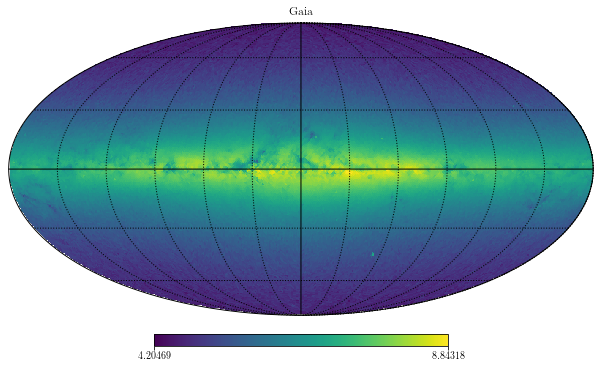

In [41]:
# from glon and glat, convert into healpix index
import healpy as hp

N = 6
nside = 2**N
index = hp.ang2pix(nside, gaia["GLON"].to_numpy(), gaia["GLAT"].to_numpy(), lonlat=True)
gaia["index"] = index
# # group by index
gaia_group = gaia.groupby("index", agg="count").sort("index", ascending=True)

m = np.log(gaia_group['count'].to_numpy())
# # # plot
hp.mollview(m, title="Gaia")
hp.graticule()


# 2MASS

In [42]:
# load 2MASS
twomass_files = glob(join(root_data_dir, '2MASS', '*hdf5'))
twomass_files.sort()
twomass_files[:5], len(twomass_files)

(['/home2/s20321005/Thesis-Project/Data/2MASS/tmass-000-001.hdf5',
  '/home2/s20321005/Thesis-Project/Data/2MASS/tmass-001-002.hdf5',
  '/home2/s20321005/Thesis-Project/Data/2MASS/tmass-002-003.hdf5',
  '/home2/s20321005/Thesis-Project/Data/2MASS/tmass-003-004.hdf5',
  '/home2/s20321005/Thesis-Project/Data/2MASS/tmass-004-005.hdf5'],
 360)

In [43]:
# read into vaex
twomass_raw = vaex.open_many(twomass_files)
twomass_raw

#,designation,use_src,rd_flg,ra,dec,Jmag,Kmag,ph_qual
0,00000019-0854280,1,222,0.000797,-8.907794,15.206,14.403,AAA
1,00000022-0837218,1,222,0.000953,-8.622733,16.299,15.435,ABC
2,00000029-0826267,1,222,0.001211,-8.440763,15.525,14.987,AAB
3,00000036-0848119,1,222,0.001505,-8.803321,13.041,12.539,AAA
4,00000039-0814222,1,222,0.001662,-8.239518,16.837,15.888,BCD
...,...,...,...,...,...,...,...,...
"470,994,547",23595767-7748117,1,222,359.990304,-77.803253,14.923,14.35,AAA
"470,994,548",23595774-7752315,1,220,359.990611,-77.875435,16.462,15.814,BDU
"470,994,549",23595796-7708459,1,222,359.991535,-77.146111,16.006,15.113,ABC
"470,994,550",23595900-7717223,1,222,359.995846,-77.289543,16.413,15.243,BBC


This is the filtering criteria is a bit shorter
* $0< J < 13.5$
* $\text{ph\_qual} = \text{A\_A}$


In [44]:
data_tmass_dir

'/home2/s20321005/Thesis-Project/Data/TMASS'

In [46]:
# for every files, filter them
for file in twomass_files:
  tmass = vaex.open(file)
  tmass_clean = tmass.filter("Jmag < 13.5").filter("Jmag > 2").filter("use_src == 1")
  ph_qual_filter = tmass_clean['ph_qual'].str.contains('^A.+A$')
  rd_flg_1_filter = tmass_clean['rd_flg'].str.contains('^1.+1$')
  rd_flg_3_filter = tmass_clean['rd_flg'].str.contains('^3.+3$')
  mask = ph_qual_filter | rd_flg_1_filter | rd_flg_3_filter
  tmass_clean = tmass_clean[mask]
  tmass_clean = tmass_clean.extract()
  name = file.split("/")[-1]
  print(f"{name}, clean: {len(tmass_clean)}, raw: {len(tmass)}, {np.round(len(tmass_clean)/len(tmass)*100,2)}%")
  # break
  if (len(tmass_clean)) == 0:
    print(f"RUSAK: {name}")
  else:
    tmass_clean.export(join(data_tmass_dir, name), progress=True)
tmass_clean

tmass-000-001.hdf5, clean: 53950, raw: 505425, 10.67%
export(hdf5) [########################################] 100.00% elapsed time  :     0.43s =  0.0m =  0.0h
 

tmass-001-002.hdf5, clean: 53204, raw: 492475, 10.8%
export(hdf5) [########################################] 100.00% elapsed time  :     0.31s =  0.0m =  0.0h
 tmass-002-003.hdf5, clean: 51708, raw: 496622, 10.41%
export(hdf5) [########################################] 100.00% elapsed time  :     0.36s =  0.0m =  0.0h
 tmass-003-004.hdf5, clean: 51059, raw: 494551, 10.32%
export(hdf5) [########################################] 100.00% elapsed time  :     0.30s =  0.0m =  0.0h
 tmass-004-005.hdf5, clean: 51021, raw: 486675, 10.48%
export(hdf5) [########################################] 100.00% elapsed time  :     0.30s =  0.0m =  0.0h
 tmass-005-006.hdf5, clean: 51898, raw: 484417, 10.71%
export(hdf5) [########################################] 100.00% elapsed time  :     0.36s =  0.0m =  0.0h
 tmass-006-007.hdf5, clean: 51958, raw: 490380, 10.6%
export(hdf5) [########################################] 100.00% elapsed time  :     0.29s =  0.0m =  0.0h
 tmass-007-008.hdf5, clean: 50877, ra

#,designation,use_src,rd_flg,ra,dec,Jmag,Kmag,ph_qual
0,23560117-0834588,1,222,359.004904,-8.583006,12.578,12.199,AAA
1,23560335-0858309,1,222,359.013998,-8.97527,10.912,10.621,AAA
2,23560645-0858024,1,222,359.026879,-8.967355,12.345,11.94,AAA
3,23560768-0803420,1,222,359.032018,-8.061681,10.864,10.55,AAA
4,23560778-0813118,1,222,359.032424,-8.219954,11.458,11.127,AAA
...,...,...,...,...,...,...,...,...
"53,952",23594291-7708495,1,222,359.928833,-77.14711,10.942,10.558,AAA
"53,953",23594324-7738278,1,212,359.93019,-77.64106,9.331,8.665,AAA
"53,954",23594896-7715221,1,222,359.954028,-77.256149,13.336,12.843,AAA
"53,955",23594907-7751479,1,222,359.954495,-77.863312,13.261,12.619,AAA


sneak peek

In [47]:
tmass_files = glob(join(data_tmass_dir, "*.hdf5"))
tmass_files.sort()
tmass_files[:5], len(tmass_files)

(['/home2/s20321005/Thesis-Project/Data/TMASS/tmass-000-001.hdf5',
  '/home2/s20321005/Thesis-Project/Data/TMASS/tmass-001-002.hdf5',
  '/home2/s20321005/Thesis-Project/Data/TMASS/tmass-002-003.hdf5',
  '/home2/s20321005/Thesis-Project/Data/TMASS/tmass-003-004.hdf5',
  '/home2/s20321005/Thesis-Project/Data/TMASS/tmass-004-005.hdf5'],
 360)

In [48]:
tmass = vaex.open_many(tmass_files)
tmass

#,designation,use_src,rd_flg,ra,dec,Jmag,Kmag,ph_qual
0,00000036-0848119,1,222,0.001505,-8.803321,13.041,12.539,AAA
1,00000135-0828045,1,222,0.005649,-8.467934,13.285,12.946,AAA
2,00000182-0806237,1,222,0.007621,-8.106606,12.34,12.006,AAA
3,00000409-0854339,1,222,0.017071,-8.909436,13.434,12.841,AAA
4,00000432-0837071,1,222,0.018027,-8.618639,11.935,11.584,AAA
...,...,...,...,...,...,...,...,...
"50,250,394",23594291-7708495,1,222,359.928833,-77.14711,10.942,10.558,AAA
"50,250,395",23594324-7738278,1,212,359.93019,-77.64106,9.331,8.665,AAA
"50,250,396",23594896-7715221,1,222,359.954028,-77.256149,13.336,12.843,AAA
"50,250,397",23594907-7751479,1,222,359.954495,-77.863312,13.261,12.619,AAA


In [49]:
# convert ra dec to galaxy coordinate using astropy
from astropy.coordinates import SkyCoord
from astropy import units as u

s = SkyCoord(ra=tmass["ra"].to_numpy()*u.degree, dec=tmass["dec"].to_numpy()*u.degree, frame='icrs')

tmass["GLON"] = s.galactic.l.value
tmass["GLAT"] = s.galactic.b.value
tmass

#,designation,use_src,rd_flg,ra,dec,Jmag,Kmag,ph_qual,GLON,GLAT
0,00000036-0848119,1,222,0.001505,-8.803321,13.041,12.539,AAA,86.96981971321303,-68.0078136346877
1,00000135-0828045,1,222,0.005649,-8.467934,13.285,12.946,AAA,87.44694392145789,-67.72464100133263
2,00000182-0806237,1,222,0.007621,-8.106606,12.34,12.006,AAA,87.94273414369448,-67.41677735821825
3,00000409-0854339,1,222,0.017071,-8.909436,13.434,12.841,AAA,86.85431580850491,-68.10596650990995
4,00000432-0837071,1,222,0.018027,-8.618639,11.935,11.584,AAA,87.265770370519,-67.85944690533118
...,...,...,...,...,...,...,...,...,...,...
"50,250,394",23594291-7708495,1,222,359.928833,-77.14711,10.942,10.558,AAA,306.63635955382,-39.60677455935141
"50,250,395",23594324-7738278,1,212,359.93019,-77.64106,9.331,8.665,AAA,306.4714000721266,-39.12957059854975
"50,250,396",23594896-7715221,1,222,359.954028,-77.256149,13.336,12.843,AAA,306.59287131500514,-39.50286890249121
"50,250,397",23594907-7751479,1,222,359.954495,-77.863312,13.261,12.619,AAA,306.39172486777227,-38.91605004930423


In [54]:
N = 6
nside = 2**N
index = hp.ang2pix(nside, tmass["GLON"].to_numpy(), tmass["GLAT"].to_numpy(), lonlat=True)
tmass["index"] = index

# group by index
tmass_group = tmass.groupby("index", agg="count").sort("index", ascending=True)

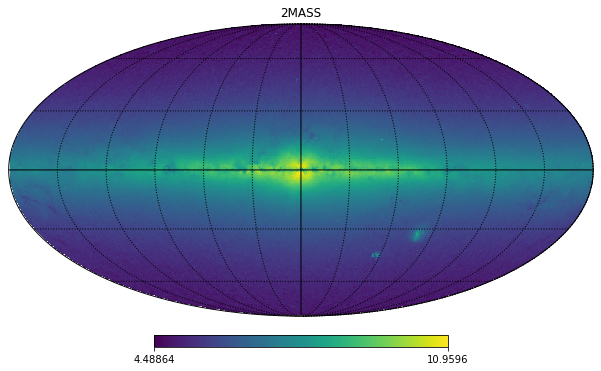

In [55]:
m = np.log(tmass_group['count'].to_numpy())
# # plot
hp.mollview(m, title="2MASS")
hp.graticule()